1. Понять, как устроены эти данные. Посчитать общую статистику.
2. Придумать логичный способ разделения этих продуктов на две части, то есть самим вручную создать "бинарный классификатор". Визуализировать результат разбиения. 
3. Придумать способ разделения на несколько классов. Визуализировать и прокомментировать результат.
4. *Проанализировать данные. Найти какую-либо зависимость одного параметра от другого.

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
food = pd.read_csv('ABBREV.csv', delimiter=';')

Saving ABBREV.csv to ABBREV.csv


In [ ]:
# 1
print("min:")
print(food.min())
print("max:")
print(food.max())
print("mean:")
print(food.mean())
print("median:")
print(food.median())
print("mode:")
print(food.mode())
print("count:")
print(food.count())

min:
NDB_No                                    1001
Shrt_Desc            ABALONE.MIXED SPECIES.RAW
Water_(g)                                  0.0
Energ_Kcal                                   0
Protein_(g)                                0.0
Lipid_Tot_(g)                              0.0
Ash_(g)                                    0.0
Carbohydrt_(g)                             0.0
Fiber_TD_(g)                               0.0
Sugar_Tot_(g)                              0.0
Calcium_(mg)                                 0
Iron_(mg)                                  0.0
Magnesium_(mg)                               0
Phosphorus_(mg)                              0
Potassium_(mg)                               0
Sodium_(mg)                                  0
Zinc_(mg)                                  0.0
Copper_mg)                                 0.0
Manganese_(mg)                             0.0
Selenium_(µg)                              0.0
Vit_C_(mg)                                 0.0
Thiamin_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


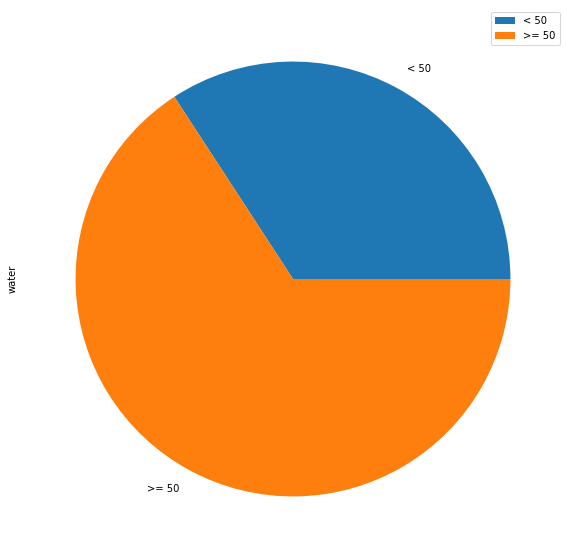

In [ ]:
# 2
# water
waterLess50 = food.loc[food["Water_(g)"] < 50]
waterMore50 = food.loc[food["Water_(g)"] >= 50]
binClassificator = pd.DataFrame({'water': [waterLess50.shape[0], waterMore50.shape[0]]}, index = ['< 50', '>= 50'])
binClassificator.plot.pie(y='water', figsize=(10, 10))

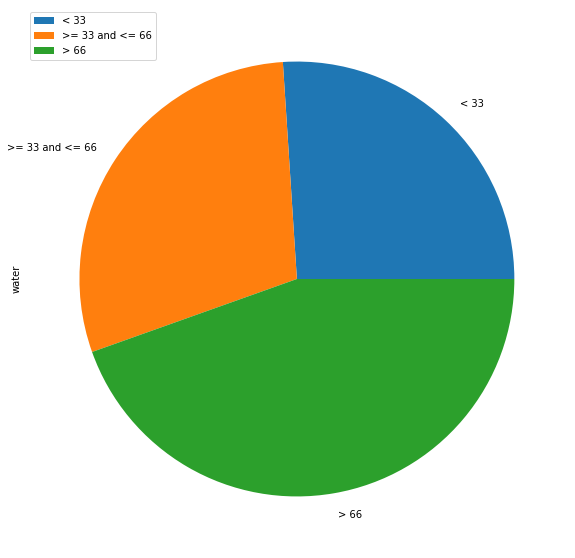

In [ ]:
# 3
# water
# import seaborn as sns
# sns.lmplot(x="Carbohydrt_(g)", y="Water_(g)", data=food)
waterLess33 = food.loc[food["Water_(g)"] < 33]
waterMore33AndLess66 = food.loc[(food["Water_(g)"] >= 33) & (food["Water_(g)"] <= 66)]
waterMore66 = food.loc[food["Water_(g)"] > 66]
binClassificator = pd.DataFrame({'water': [waterLess33.shape[0], waterMore33AndLess66.shape[0], waterMore66.shape[0]]}, index = ['< 33', '>= 33 and <= 66', '> 66'])
binClassificator.plot.pie(y='water', figsize=(10, 10))

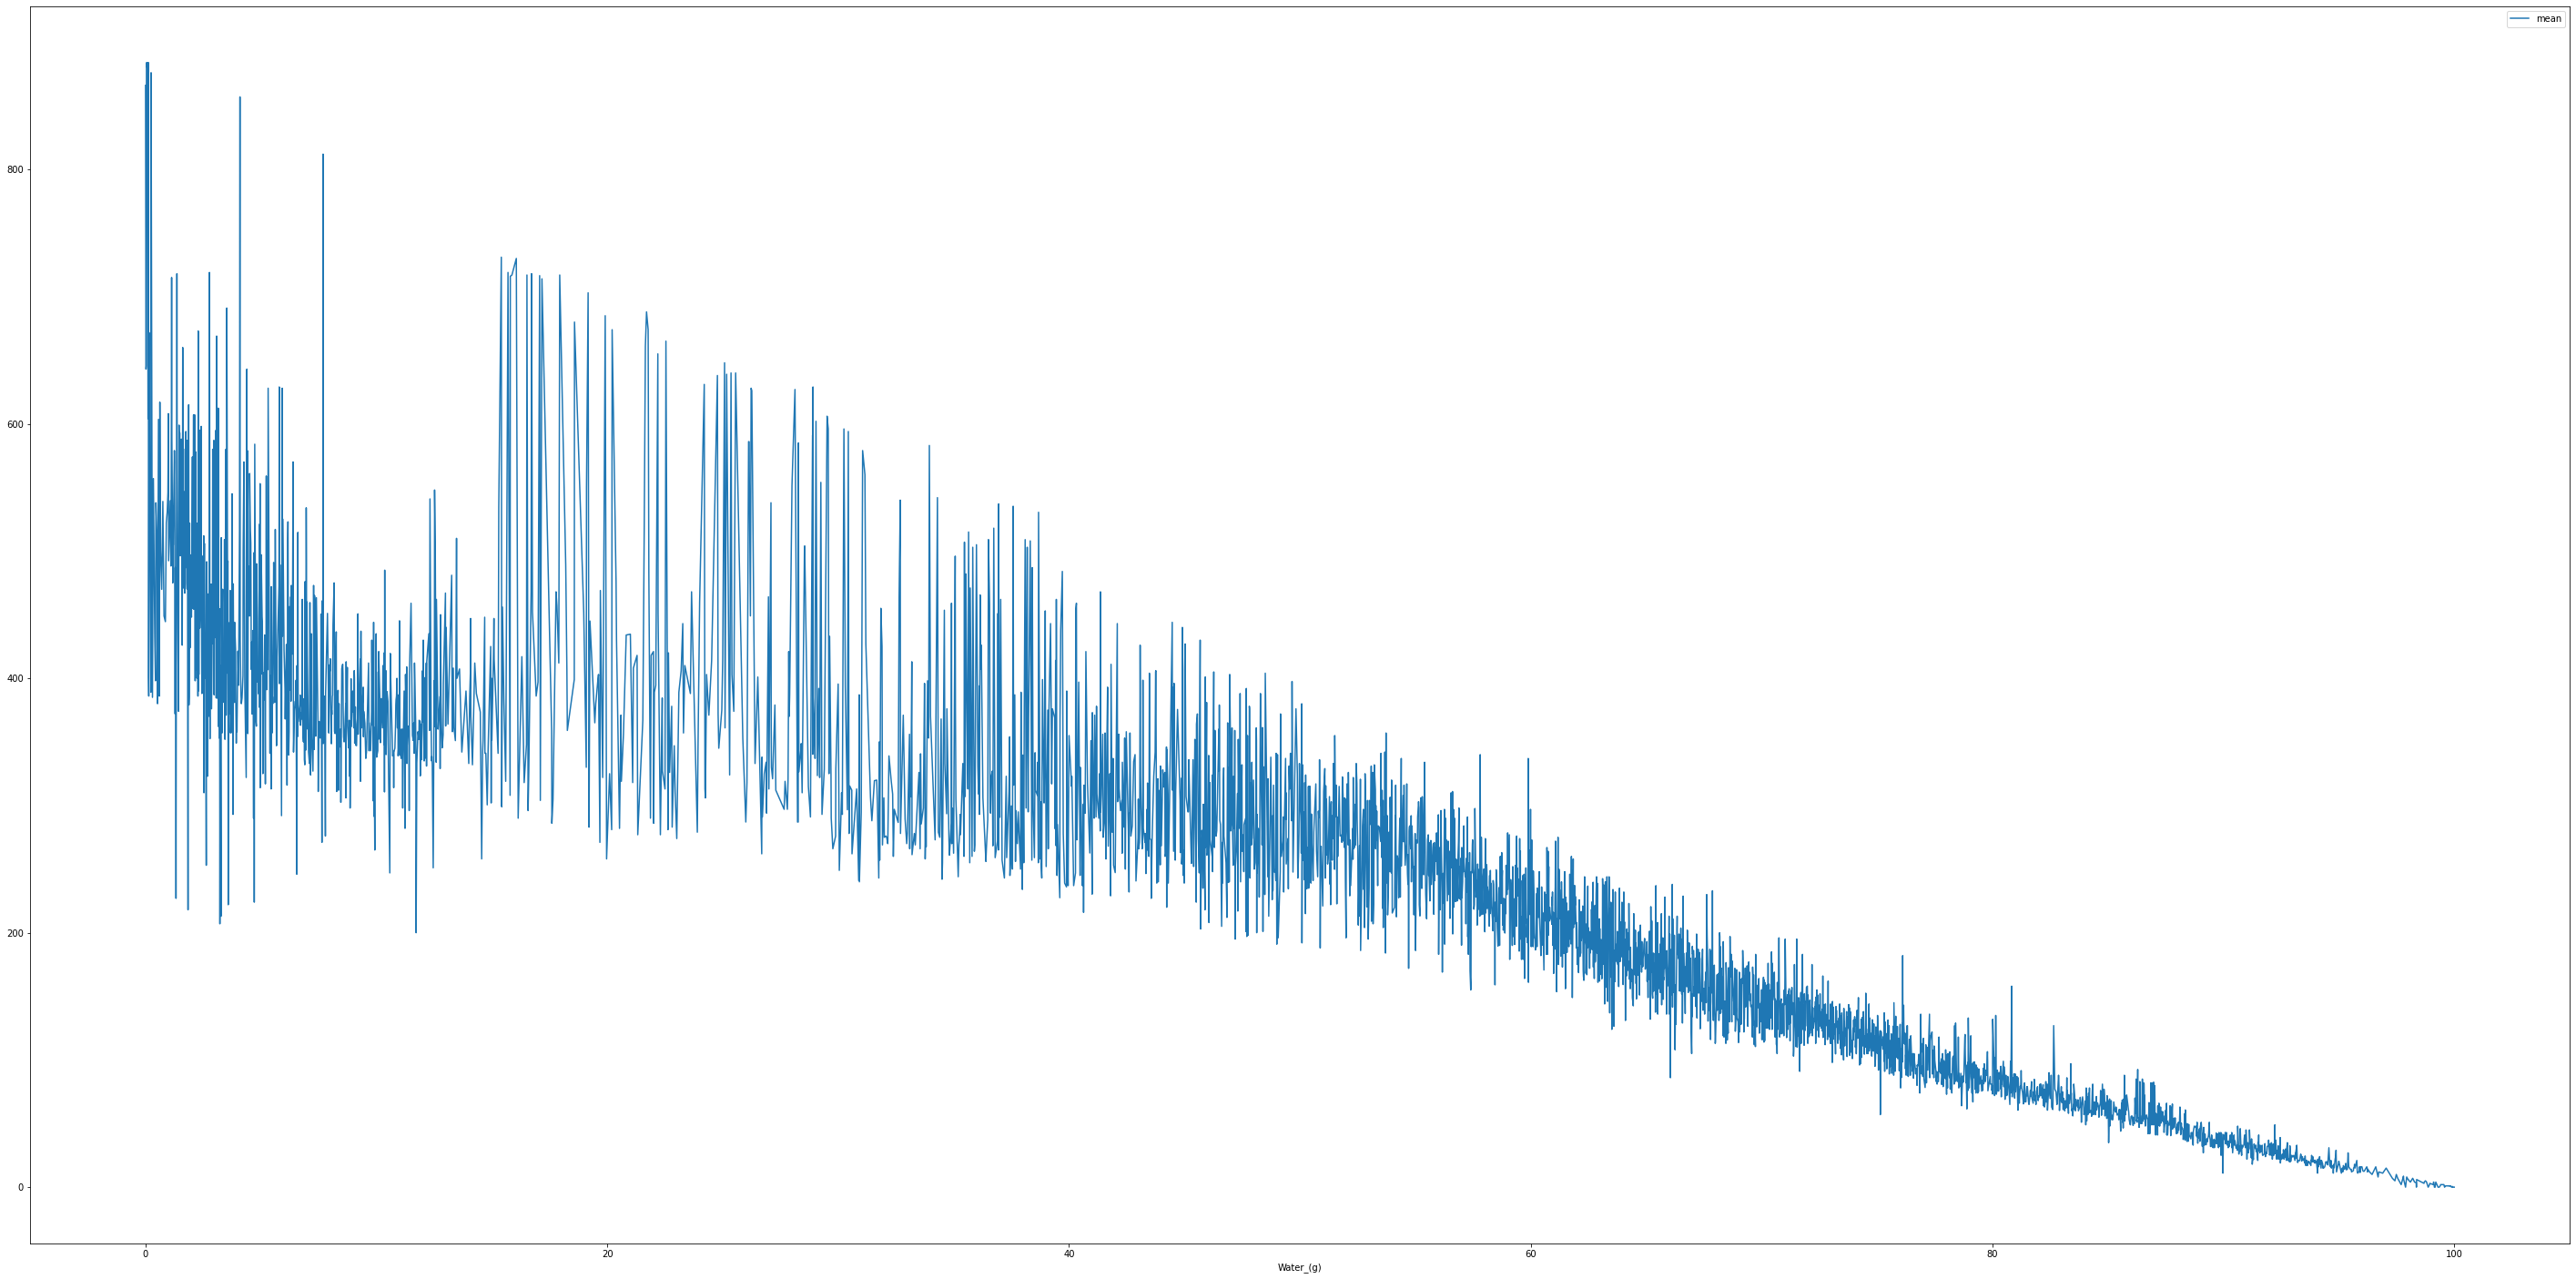

In [ ]:
# 4
food.groupby('Water_(g)').aggregate(['mean'])['Energ_Kcal'].plot(figsize=(50, 25))

In [ ]:
lst = []
for index, row in food.iterrows():
  if row["Water_(g)"] < 33:
    lst.append(0)
  elif row["Water_(g)"] >= 33 and row["Water_(g)"] < 66:
    lst.append(1)
  else:
    lst.append(2)

food.insert(2, "class", lst, True)

In [ ]:
food.head(10)

,NDB_No,Shrt_Desc,class,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,BUTTER.WITH SALT,0,15.87,717,0.85,81.11,2.11,0.06,0.0,...,7.0,51.368,21.021,3.043,215,5.00,"1 pat. (1"" sq. 1/3"" high)",14.2,1 tbsp,0.0
1,1002,BUTTER.WHIPPED.W/ SALT,0,16.72,718,0.49,78.30,1.62,2.87,0.0,...,4.6,45.390,19.874,3.331,225,3.80,"1 pat. (1"" sq. 1/3"" high)",9.4,1 tbsp,0.0
2,1003,BUTTER OIL.ANHYDROUS,0,0.24,876,0.28,99.48,0.00,0.00,0.0,...,8.6,61.924,28.732,3.694,256,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,CHEESE.BLUE,1,42.41,353,21.40,28.74,5.11,2.34,0.0,...,2.4,18.669,7.778,0.800,75,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,CHEESE.BRICK,1,41.11,371,23.24,29.68,3.18,2.79,0.0,...,2.5,18.764,8.598,0.784,94,132.00,1 cup. diced,113.0,1 cup. shredded,0.0
5,1006,CHEESE.BRIE,1,48.42,334,20.75,27.68,2.70,0.45,0.0,...,2.3,17.410,8.013,0.826,100,28.35,1 oz,144.0,1 cup. sliced,0.0
6,1007,CHEESE.CAMEMBERT,1,51.80,300,19.80,24.26,3.68,0.46,0.0,...,2.0,15.259,7.023,0.724,72,28.35,1 oz,246.0,1 cup,0.0
7,1008,CHEESE.CARAWAY,1,39.28,376,25.18,29.20,3.28,3.06,0.0,...,0.0,18.584,8.275,0.830,93,28.35,1 oz,0.0,0,0.0
8,1009,CHEESE.CHEDDAR,1,37.02,404,22.87,33.31,3.71,3.09,0.0,...,2.4,18.867,9.246,1.421,99,132.00,1 cup. diced,244.0,1 cup. melted,0.0
9,1010,CHEESE.CHESHIRE,1,37.65,387,23.37,30.60,3.60,4.78,0.0,...,0.0,19.475,8.671,0.870,103,28.35,1 oz,0.0,0,0.0


In [ ]:
food.to_csv('./myCSV.csv', sep=';')